In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
print(os.listdir("homecredit_defaultrisk"))


['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv('homecredit_defaultrisk/application_train.csv')
POS_CASH_balance = pd.read_csv('homecredit_defaultrisk/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('homecredit_defaultrisk/bureau_balance.csv')
previous_application = pd.read_csv('homecredit_defaultrisk/previous_application.csv')
installments_payments = pd.read_csv('homecredit_defaultrisk/installments_payments.csv')
credit_card_balance = pd.read_csv('homecredit_defaultrisk/credit_card_balance.csv')
bureau = pd.read_csv('homecredit_defaultrisk/bureau.csv')
application_test = pd.read_csv('homecredit_defaultrisk/application_test.csv')

In [4]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [6]:
POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Values Check ###

In [13]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(121)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
REGION_POPULATION_RELATIVE,0,0.000000
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000


In [14]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
print(application_train['EXT_SOURCE_1'])

0         0.083037
1         0.311267
2              NaN
3              NaN
4              NaN
            ...   
307506    0.145570
307507         NaN
307508    0.744026
307509         NaN
307510    0.734460
Name: EXT_SOURCE_1, Length: 307511, dtype: float64


In [16]:
print(application_train['TARGET'])

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


In [17]:
print(application_train['CODE_GENDER'])

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object


In [18]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [19]:
application_train["TARGET"].isnull().sum()

0

In [20]:
# checking missing data
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087.0,NaN
CNT_INSTALMENT,26071.0,NaN
SK_ID_PREV,0.0,NaN
SK_ID_CURR,0.0,0.000000
MONTHS_BALANCE,0.0,NaN
NAME_CONTRACT_STATUS,0.0,NaN
SK_DPD,0.0,NaN
SK_DPD_DEF,0.0,NaN
COMMONAREA_MEDI,NaN,69.872297
COMMONAREA_AVG,NaN,69.872297


In [21]:
# checking missing data
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
AMT_PAYMENT_CURRENT,767988.0,NaN
AMT_DRAWINGS_ATM_CURRENT,749816.0,NaN
CNT_DRAWINGS_POS_CURRENT,749816.0,NaN
AMT_DRAWINGS_OTHER_CURRENT,749816.0,NaN
AMT_DRAWINGS_POS_CURRENT,749816.0,NaN
CNT_DRAWINGS_OTHER_CURRENT,749816.0,NaN
CNT_DRAWINGS_ATM_CURRENT,749816.0,NaN
CNT_INSTALMENT_MATURE_CUM,305236.0,NaN
AMT_INST_MIN_REGULARITY,305236.0,NaN
SK_ID_PREV,0.0,NaN


In [22]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
AMT_ANNUITY,1226791.0,0.003902
AMT_CREDIT_MAX_OVERDUE,1124488.0,NaN
DAYS_ENDDATE_FACT,633653.0,NaN
AMT_CREDIT_SUM_LIMIT,591780.0,NaN
AMT_CREDIT_SUM_DEBT,257669.0,NaN
DAYS_CREDIT_ENDDATE,105553.0,NaN
AMT_CREDIT_SUM,13.0,NaN
CREDIT_ACTIVE,0.0,NaN
CREDIT_CURRENCY,0.0,NaN
DAYS_CREDIT,0.0,NaN


In [23]:
# checking missing data
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
SK_ID_BUREAU,0.0,NaN
MONTHS_BALANCE,0.0,NaN
STATUS,0.0,NaN
COMMONAREA_MEDI,NaN,69.872297
COMMONAREA_AVG,NaN,69.872297
COMMONAREA_MODE,NaN,69.872297
NONLIVINGAPARTMENTS_MODE,NaN,69.432963
NONLIVINGAPARTMENTS_AVG,NaN,69.432963
NONLIVINGAPARTMENTS_MEDI,NaN,69.432963
FONDKAPREMONT_MODE,NaN,68.386172


In [24]:
# checking missing data
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263.0,NaN
RATE_INTEREST_PRIMARY,1664263.0,NaN
AMT_DOWN_PAYMENT,895844.0,NaN
RATE_DOWN_PAYMENT,895844.0,NaN
NAME_TYPE_SUITE,820405.0,0.420148
NFLAG_INSURED_ON_APPROVAL,673065.0,NaN
DAYS_TERMINATION,673065.0,NaN
DAYS_LAST_DUE,673065.0,NaN
DAYS_LAST_DUE_1ST_VERSION,673065.0,NaN
DAYS_FIRST_DUE,673065.0,NaN


In [25]:
# checking missing data
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(25)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905.0,NaN
AMT_PAYMENT,2905.0,NaN
SK_ID_PREV,0.0,NaN
SK_ID_CURR,0.0,0.000000
NUM_INSTALMENT_VERSION,0.0,NaN
NUM_INSTALMENT_NUMBER,0.0,NaN
DAYS_INSTALMENT,0.0,NaN
AMT_INSTALMENT,0.0,NaN
COMMONAREA_MEDI,NaN,69.872297
COMMONAREA_AVG,NaN,69.872297


### Data Exploration and Visualization

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


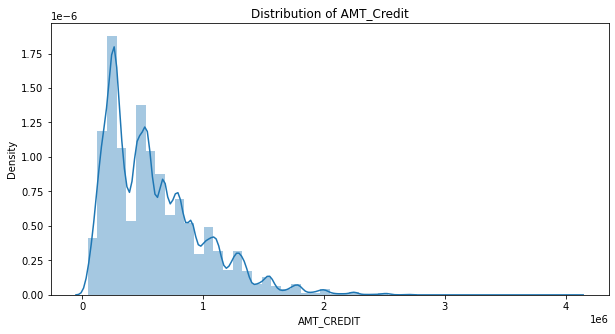

In [26]:
plt.figure(figsize = (10, 5))
plt.title("Distribution of AMT_Credit")
sh = sns.distplot(application_train["AMT_CREDIT"])

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


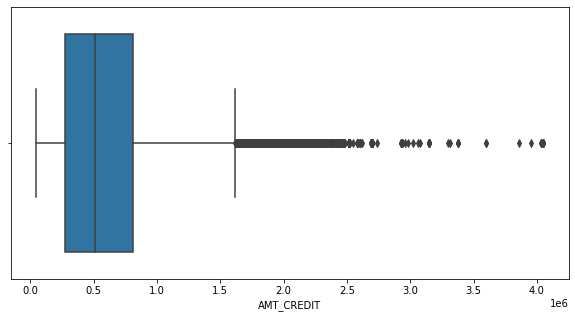

In [27]:
#Look at the distribution of the AMT_CREDIT variable with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(application_train["AMT_CREDIT"])
plt.show()

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


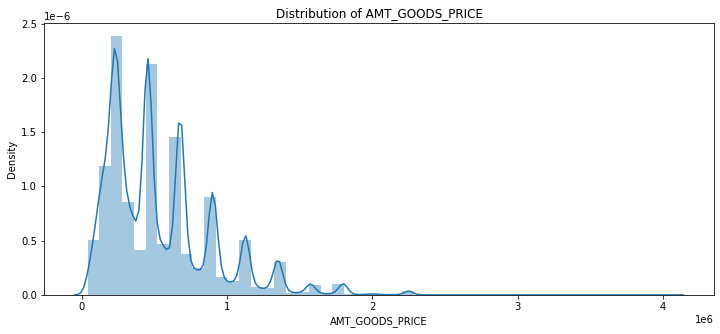

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


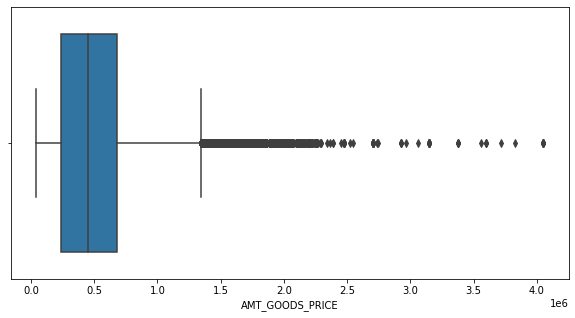

In [29]:
#Look at the distribution of the AMT_GOODS_PRICE variable with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(application_train["AMT_GOODS_PRICE"])
plt.show()

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


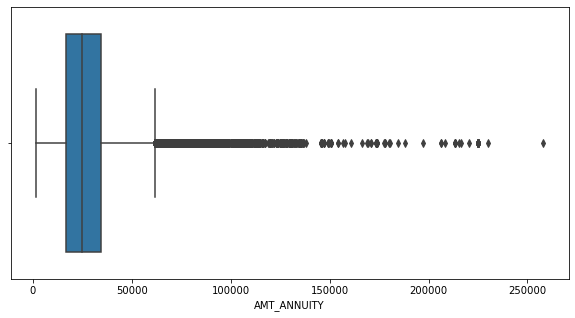

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(application_train["AMT_ANNUITY"])
plt.show()

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


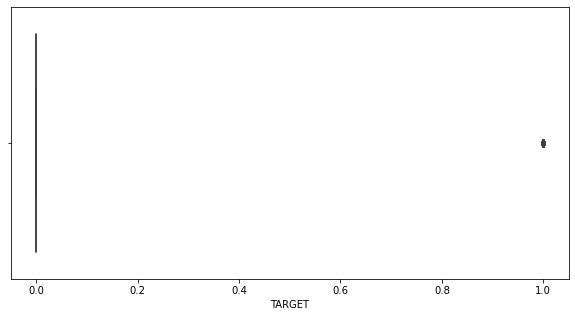

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(application_train["TARGET"])
plt.show()

In [32]:
def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(4, 2, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'TARGET':
            i += 1
            plt.subplot(4, 2, i)
            sns.kdeplot(t1[feature], bw=0.5, color='red', label="TARGET = 1")
            sns.kdeplot(t0[feature], bw=0.5, color='blue', label="default = 0")
            plt.ylabel('Density plot', fontsize=12)
            plt.xlabel(feature, fontsize=12)
            plt.xticks(fontsize=12, rotation=90)  # Set the font size for x-axis labels
            plt.yticks(fontsize=12)  # Set the font size for y-axis labels
            plt.legend(fontsize=12)  # Display the legend

    plt.suptitle('Density Plot for Features by Target', fontsize=16, y=1.02)  # Add a title for the figure
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()


In [33]:
domain_features=['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED',
                 'AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distribution

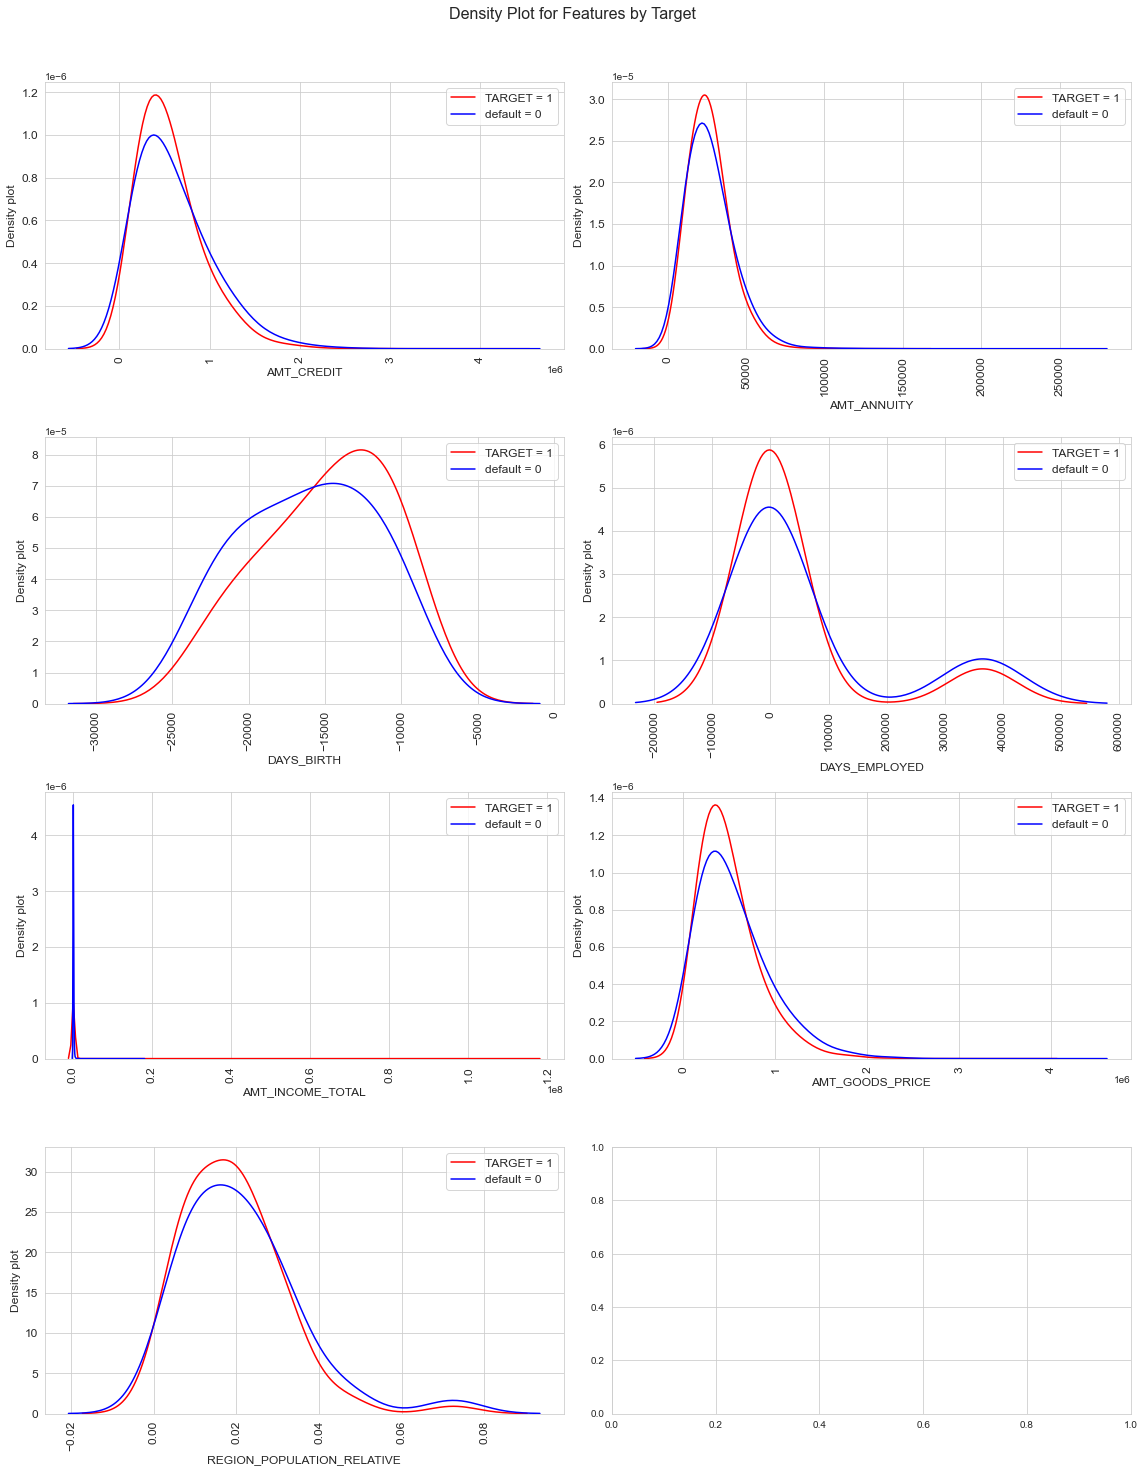

In [34]:
plot_distribution(application_train, domain_features)

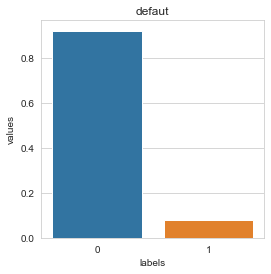

In [35]:
temp = application_train.TARGET.value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(application_train)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


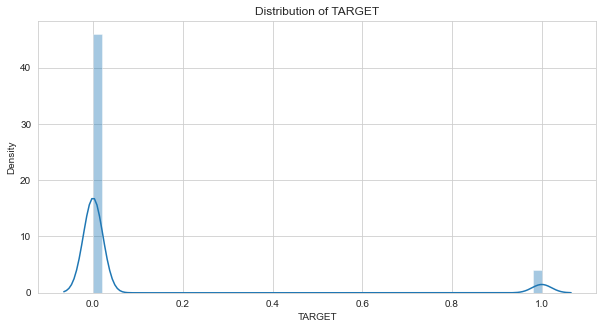

In [36]:
plt.figure(figsize = (10, 5))
plt.title("Distribution of TARGET")
sh = sns.distplot(application_train["TARGET"])

imbalanced

<h3> Numeric Features <h3>

In [37]:
NUMERIC_FEATURES = application_train.select_dtypes(
    ['int8','int16','float16','int32','float32','int64','float64']).columns

In [42]:
application_train[NUMERIC_FEATURES].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


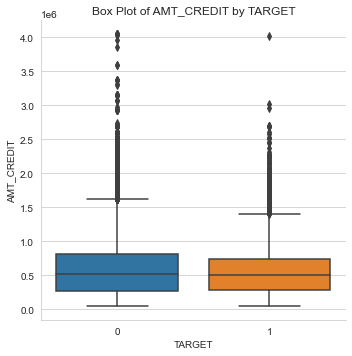

In [43]:
# Create the box plot
sns.catplot(data=application_train, x='TARGET', y='AMT_CREDIT', kind='box')

# Set plot labels and title
plt.xlabel('TARGET')
plt.ylabel('AMT_CREDIT')
plt.title('Box Plot of AMT_CREDIT by TARGET')

# Show the plot
plt.show()

'EXT_SOURCE_1', 'EXT_SOURCE_2', and 'EXT_SOURCE_3' are numerical features that represent external credit-related scores or indicators that may be very useful

In [44]:
EXT_SOURCE_TARGET=['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
application_train[EXT_SOURCE_TARGET].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.0,0.214,0.1868,-0.1553
EXT_SOURCE_2,0.214,1.0,0.1092,-0.1605
EXT_SOURCE_3,0.1868,0.1092,1.0,-0.1789
TARGET,-0.1553,-0.1605,-0.1789,1.0


The code aims to calculate the correlation matrix between the columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', and 'TARGET' in the DataFrame application_train. It then applies some formatting and adds a background gradient to the correlation matrix using Seaborn's heatmap style.

<h3> Categorical Features <h3>

In [45]:
application_train.select_dtypes('O').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

In [46]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
        
        sns.set_color_codes("pastel")
        
        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        
        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        
        
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

In [47]:
important_features=['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE',
'ORGANIZATION_TYPE']

In [48]:
important_features

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

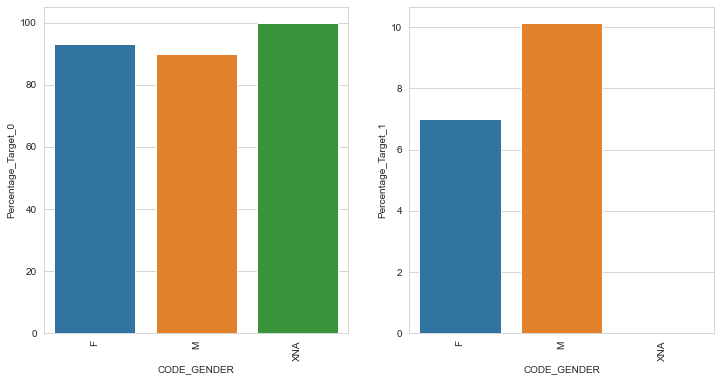

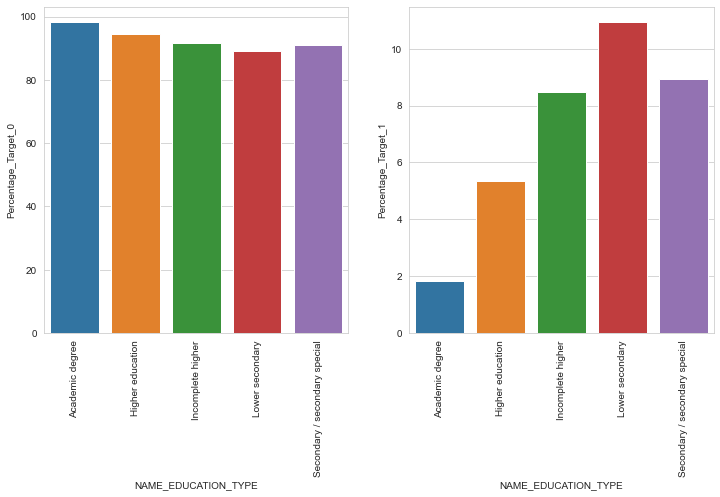

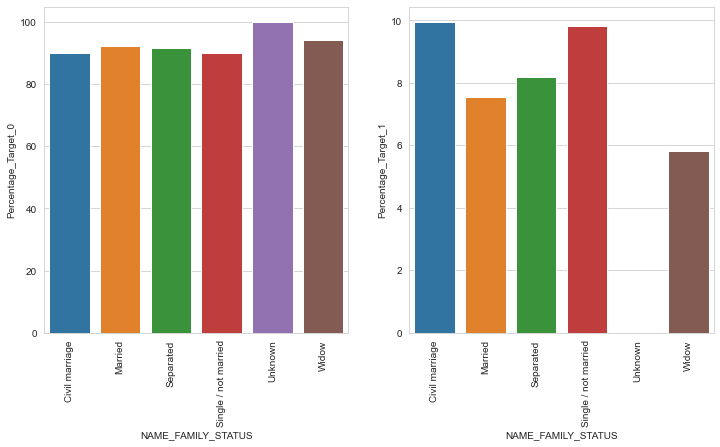

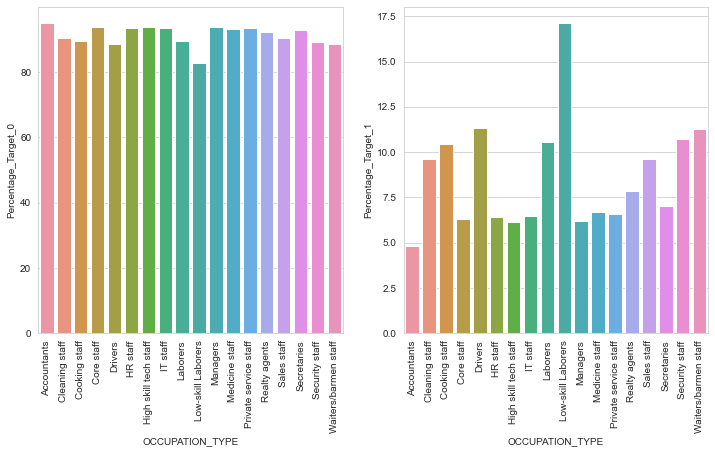

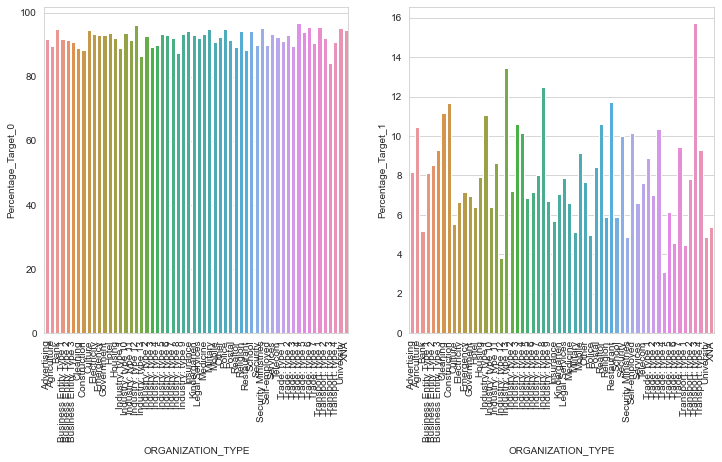

In [49]:
cat_stats(application_train,important_features)

it seems that women are less defaulted than men and they are more repayable than men.So as a recommandation to the bank is to improve the procedure of repayment of loans given to men.

In [50]:

from scipy import stats
def chi2_test(df):
    chi2_stat_list=[]; p_val_list=[]; dof_list=[]; ex_list=[]
    for var in df.columns:
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(application_train['TARGET'], application_train[var]))
        chi2_stat_list.append(chi2_stat); p_val_list.append(p_val); dof_list.append(dof); ex_list.append(ex);
    chi_squared=pd.DataFrame({'variable':df.columns,'dof':dof_list,'chi2_stat':chi2_stat_list,'p_val':p_val_list})
    chi_squared.set_index('variable',inplace=True)
    print(chi_squared.sort_values(by='p_val',ascending=True))

In [51]:
chi2_test(application_train.select_dtypes('O'))

                            dof    chi2_stat          p_val
variable                                                   
ORGANIZATION_TYPE            57  1609.240636  5.224541e-299
OCCUPATION_TYPE              17  1402.846796  3.784500e-288
NAME_INCOME_TYPE              7  1253.470808  1.928146e-266
NAME_EDUCATION_TYPE           4  1019.213187  2.447681e-219
CODE_GENDER                   2   920.791334  1.129022e-200
NAME_FAMILY_STATUS            5   504.694083  7.744842e-107
NAME_HOUSING_TYPE             5   420.556190   1.099089e-88
NAME_CONTRACT_TYPE            1   293.150542   1.023515e-65
FLAG_OWN_CAR                  1   146.656018   9.330994e-34
WALLSMATERIAL_MODE            6   139.235314   1.453180e-27
HOUSETYPE_MODE                2    27.632556   9.992328e-07
EMERGENCYSTATE_MODE           1    23.678150   1.138680e-06
NAME_TYPE_SUITE               6    32.825315   1.132931e-05
FLAG_OWN_REALTY               1    11.575827   6.681470e-04
FONDKAPREMONT_MODE            3    16.80

### Data Preprocessing ###

In [52]:
application_train.drop('SK_ID_CURR',inplace=True,axis=1)
SK_ID_CURR=application_test['SK_ID_CURR']
application_test.drop('SK_ID_CURR',inplace=True,axis=1)
application_train['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)
application_test['DAYS_EMPLOYED'].replace(365243,np.nan,inplace=True)
application_train['CODE_GENDER'].replace('XNA',np.nan,inplace=True)
application_test['CODE_GENDER'].replace('XNA',np.nan,inplace=True)

In [53]:
FLAG_DOCUMENT=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']
application_train['FLAG_DOCUMENT']=application_train[FLAG_DOCUMENT].sum(axis=1)
application_test['FLAG_DOCUMENT']=application_test[FLAG_DOCUMENT].sum(axis=1)
application_train.drop(FLAG_DOCUMENT,axis=1,inplace=True)
application_test.drop(FLAG_DOCUMENT,axis=1,inplace=True)

In [54]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT']
application_train.drop(AMT_REQ_CREDIT,axis=1,inplace=True)
application_test.drop(AMT_REQ_CREDIT,axis=1,inplace=True)

In [55]:
application_train['AGE']=application_train['DAYS_BIRTH']/(-365)
application_test['AGE']=application_test['DAYS_BIRTH']/(-365)
# MEAN_EXT_SOURCE
application_train['MEAN_EXT_SOURCE'] = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
application_test['MEAN_EXT_SOURCE'] = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# Generate YEARS_EMPLOYED
application_train['YEARS_EMPLOYED']=application_train['DAYS_EMPLOYED']/(-365)
application_test['YEARS_EMPLOYED']=application_test['DAYS_EMPLOYED']/(-365)
# DAYS_BIRTH_SQUARED
application_train['DAYS_BIRTH_SQUARED'] = application_train['DAYS_BIRTH'] ** 2
application_test['DAYS_BIRTH_SQUARED'] = application_test['DAYS_BIRTH'] ** 2
# Generate DEBT_TO_INCOME_RATIO 
application_train['DEBT_TO_INCOME_RATIO'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_test['DEBT_TO_INCOME_RATIO'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']
# Generate INCOME_TO_CREDIT 
application_train['INCOME_TO_CREDIT'] = application_train['AMT_INCOME_TOTAL'] / application_train['AMT_CREDIT']
application_test['INCOME_TO_CREDIT'] = application_test['AMT_INCOME_TOTAL'] / application_test['AMT_CREDIT']

In [56]:
new_numeric_features=['AGE','YEARS_EMPLOYED','DEBT_TO_INCOME_RATIO',
                      'INCOME_TO_CREDIT','DAYS_BIRTH_SQUARED']

In [57]:
def t_test(df):
    t_stat_list=[]
    p_val_list=[]
    variable=[]

    for var in df.columns:    
        t_stat, p_val = stats.ttest_ind(application_train[application_train['TARGET'] == 0][var],
                                        application_train[application_train['TARGET'] == 1][var])
        if p_val < 0.05:
            variable.append(var)
            t_stat_list.append(t_stat)
            p_val_list.append(p_val)

    t_test = pd.DataFrame({'variable': variable, 't_stat': t_stat_list, 'p_val': p_val_list})
    return t_test.sort_values(by='p_val',ascending=True)

In [58]:
t_test(application_train[new_numeric_features])

,variable,t_stat,p_val
0,AGE,43.519836,0.000000
2,DAYS_BIRTH_SQUARED,42.642647,0.000000
1,DEBT_TO_INCOME_RATIO,4.284907,0.000018


In [59]:
# Detect highly missing numeric features 
application_train_= application_train.select_dtypes(include=['number'])
missings=application_train_.loc[:,application_train_.isna().mean() >= 0.6]
highly_missing_features = missings.columns
missings.columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI'],
      dtype='object')

In [60]:
#Remove highly missing features
application_train.drop(highly_missing_features,axis=1,inplace=True)
application_test.drop(highly_missing_features,axis=1,inplace=True)

In [61]:
from sklearn.impute import SimpleImputer

target = application_train['TARGET']
features_train = application_train.drop('TARGET', axis=1)

# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
numeric_features_train = features_train.select_dtypes(include='number')
imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)
numeric_features_test = application_test.select_dtypes(include='number')
imputed_numeric_features_test = numeric_imputer.transform(numeric_features_test)

Encoding categorical data

In [62]:
features_train= application_train.drop('TARGET', axis = 1)

categorical_features_train = features_train.select_dtypes(include='object')
# using dummy_na=False ,we perform onehot encoding without affecting data distribution
dummy_categorical_features_train = pd.get_dummies(categorical_features_train,dummy_na=False)

# Concatenate imputed numerical and categorical features Train
imputed_features_train = pd.concat([pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns),
                              dummy_categorical_features_train] ,axis=1)

# Impute categorical features Test using mode imputation and one-hot encoding

categorical_features_test = application_test.select_dtypes(include='object')
dummy_categorical_features_test = pd.get_dummies(categorical_features_test,dummy_na=False)

# Concatenate imputed numerical and categorical features
imputed_features_test = pd.concat([pd.DataFrame(imputed_numeric_features_test, columns=numeric_features_test.columns),
                              dummy_categorical_features_test],
                             axis=1)

In [63]:
imputed_features_train.drop('NAME_INCOME_TYPE_Maternity leave',axis=1,inplace=True)
imputed_features_train.drop('NAME_FAMILY_STATUS_Unknown',axis=1,inplace=True)

Outlier 

In [66]:
Q1=application_train["AMT_CREDIT"].quantile(0.25)
Q3=application_train["AMT_CREDIT"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
application_train.loc[(application_train["AMT_CREDIT"]>upper_range),:]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT,AGE,MEAN_EXT_SOURCE,YEARS_EMPLOYED,DAYS_BIRTH_SQUARED,DEBT_TO_INCOME_RATIO,INCOME_TO_CREDIT
60,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,1588500.0,...,0.0,-1572.0,1.0,1,55.126027,0.633907,6.701370,404854641,9.244375,0.108174
135,0,Cash loans,M,N,Y,0,180000.0,1755000.0,61132.5,1755000.0,...,0.0,0.0,2.0,1,44.071233,0.561538,4.243836,258759396,9.750000,0.102564
189,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,...,0.0,-926.0,3.0,1,30.621918,0.536725,4.147945,124925329,7.142857,0.140000
235,1,Cash loans,F,N,Y,0,157500.0,1710000.0,66262.5,1710000.0,...,0.0,-1246.0,NaN,0,63.361644,0.126332,25.408219,534858129,10.857143,0.092105
314,0,Cash loans,M,N,Y,0,270000.0,1800000.0,62698.5,1800000.0,...,0.0,-991.0,4.0,1,46.846575,0.541591,1.367123,292375801,6.666667,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307216,0,Cash loans,F,Y,Y,0,225000.0,1827549.0,50386.5,1525500.0,...,0.0,-2056.0,NaN,1,51.430137,0.724183,NaN,352387984,8.122440,0.123116
307252,0,Cash loans,M,Y,N,0,292500.0,1724220.0,50544.0,1350000.0,...,0.0,-1510.0,0.0,1,57.452055,0.733798,0.638356,439740900,5.894769,0.169642
307401,0,Cash loans,F,Y,Y,0,135000.0,1718473.5,47385.0,1345500.0,...,0.0,-1695.0,1.0,1,52.000000,0.311907,NaN,360240400,12.729433,0.078558
307422,0,Cash loans,F,N,Y,0,202500.0,1971072.0,68643.0,1800000.0,...,0.0,0.0,1.0,1,62.471233,0.710292,NaN,519931204,9.733689,0.102736


In [67]:
Q1=application_train["AMT_GOODS_PRICE"].quantile(0.25)
Q3=application_train["AMT_GOODS_PRICE"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
application_train.loc[(application_train["AMT_GOODS_PRICE"]>upper_range),:]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT,AGE,MEAN_EXT_SOURCE,YEARS_EMPLOYED,DAYS_BIRTH_SQUARED,DEBT_TO_INCOME_RATIO,INCOME_TO_CREDIT
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0.0,-1562.0,2.0,2,37.747945,0.663607,8.575342,189833284,9.127053,0.109564
7,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0.0,-1070.0,0.0,1,51.643836,0.627467,1.230137,355322500,4.250000,0.235294
48,0,Cash loans,F,N,N,0,130500.0,1350000.0,37255.5,1350000.0,...,0.0,-784.0,0.0,1,54.046575,0.588826,12.084932,389154529,10.344828,0.096667
49,0,Cash loans,M,Y,Y,0,360000.0,1506816.0,49927.5,1350000.0,...,1.0,-1498.0,NaN,1,50.038356,0.523934,26.090411,333573696,4.185600,0.238914
60,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,1588500.0,...,0.0,-1572.0,1.0,1,55.126027,0.633907,6.701370,404854641,9.244375,0.108174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307422,0,Cash loans,F,N,Y,0,202500.0,1971072.0,68643.0,1800000.0,...,0.0,0.0,1.0,1,62.471233,0.710292,NaN,519931204,9.733689,0.102736
307452,0,Cash loans,F,Y,N,2,153000.0,1350000.0,46926.0,1350000.0,...,0.0,-741.0,1.0,1,35.967123,0.628948,1.087671,172344384,8.823529,0.113333
307476,0,Cash loans,F,N,N,2,135000.0,1762110.0,48456.0,1575000.0,...,0.0,-2538.0,1.0,1,37.780822,0.559554,5.145205,190164100,13.052667,0.076613
307480,0,Cash loans,F,N,N,1,81000.0,1350000.0,39474.0,1350000.0,...,0.0,-1594.0,4.0,1,28.950685,0.663549,10.561644,111661489,16.666667,0.060000


In [68]:
Q1=application_train["AMT_ANNUITY"].quantile(0.25)
Q3=application_train["AMT_ANNUITY"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
application_train.loc[(application_train["AMT_ANNUITY"]>upper_range),:]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT,AGE,MEAN_EXT_SOURCE,YEARS_EMPLOYED,DAYS_BIRTH_SQUARED,DEBT_TO_INCOME_RATIO,INCOME_TO_CREDIT
60,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,1588500.0,...,0.0,-1572.0,1.0,1,55.126027,0.633907,6.701370,404854641,9.244375,0.108174
94,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,...,0.0,-591.0,2.0,1,27.942466,0.254919,5.520548,104019601,3.026857,0.330376
112,0,Cash loans,F,N,Y,0,202500.0,1136439.0,73611.0,1089000.0,...,0.0,-905.0,1.0,1,64.810959,0.694454,2.652055,559606336,5.612044,0.178188
189,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,...,0.0,-926.0,3.0,1,30.621918,0.536725,4.147945,124925329,7.142857,0.140000
191,0,Cash loans,F,N,Y,0,225000.0,684054.0,77494.5,630000.0,...,0.0,-584.0,4.0,1,64.810959,0.664541,32.556164,559606336,3.040240,0.328921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307120,0,Cash loans,F,N,Y,0,360000.0,1159758.0,61920.0,1044000.0,...,0.0,-1842.0,6.0,1,57.997260,0.660593,NaN,448126561,3.221550,0.310410
307165,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,...,1.0,-698.0,4.0,0,29.027397,0.685095,9.961644,112254025,5.600000,0.178571
307374,0,Cash loans,M,Y,Y,0,270000.0,1042560.0,66757.5,900000.0,...,0.0,-3384.0,3.0,1,36.668493,0.583601,12.306849,179131456,3.861333,0.258978
307392,0,Cash loans,F,N,Y,0,315000.0,1391130.0,77809.5,1305000.0,...,0.0,-1471.0,0.0,1,59.578082,0.631034,NaN,472888516,4.416286,0.226435


### Modeling 

In [69]:
from sklearn.model_selection import train_test_split

X=imputed_features_train.copy()
y=target
#splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state= 12)

In [70]:
from imblearn.over_sampling import SMOTE

#memisah nama kolom variabel prediktor dan target
y_cols=["TARGET"]
x_cols= [x for x in application_train.columns if x not in y_cols]

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=x_cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=y_cols)

In [71]:
#proportion before using SMOTE
y_train.value_counts()

0    226148
1     19860
Name: TARGET, dtype: int64

In [72]:
#proportion after using SMOTE
train_smote_Y["TARGET"].value_counts()

0    226148
1    226148
Name: TARGET, dtype: int64

In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train =ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [75]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()

  
}

# Melatih model untuk masing-masing algoritma dan dapatkan laporan klasifikasi
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'=== {name} ===')
    print(report)

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.63      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.77      0.51      0.49     61503
weighted avg       0.90      0.92      0.88     61503

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.67      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.79      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       1.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weig